# Library

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

# Load Data

In [2]:
df = pd.read_csv('data.csv', sep=',', index_col='PassengerId')
df.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0000,C93,S
473,1,2,"West, Mrs. Edwy Arthur (Ada Mary Worth)",female,33.0,1,2,C.A. 34651,27.7500,NaN,S
685,0,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,39.0000,NaN,S
265,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S
826,0,3,"Flynn, Mr. John",male,NaN,0,0,368323,6.9500,NaN,Q
572,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S


# Data Preprocessing

In [3]:
df.shape

(891, 11)

In [4]:
# Dropping Columns
df = df.drop(columns=['Name', 'Ticket'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


In [6]:
# Looking for Missing Value
df.isna().sum() / df.shape[0]*100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [7]:
# Checking for Duplicate
df.duplicated().sum()

np.int64(107)

In [8]:
# Checking for Garbage Values
for i in df.select_dtypes('object').columns:
    print(df[i].value_counts())
    print("***" * 10)

Sex
male      577
female    314
Name: count, dtype: int64
******************************
Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64
******************************
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
******************************


## Exploratory Data Analysis

### Descriptive Statistics

In [9]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.describe(include='object')

,Sex,Cabin,Embarked
count,891,204,889
unique,2,147,3
top,male,G6,S
freq,577,4,644


### Data Distribution

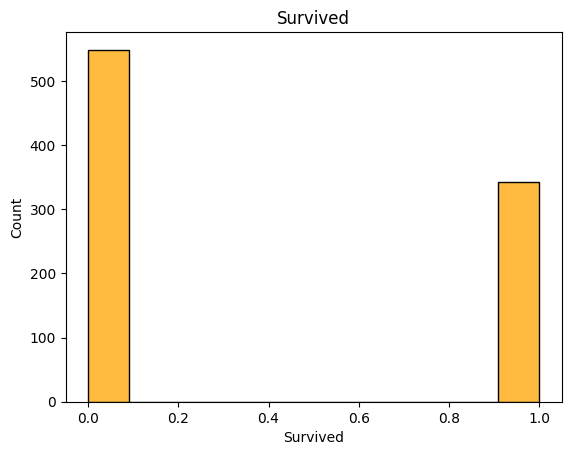

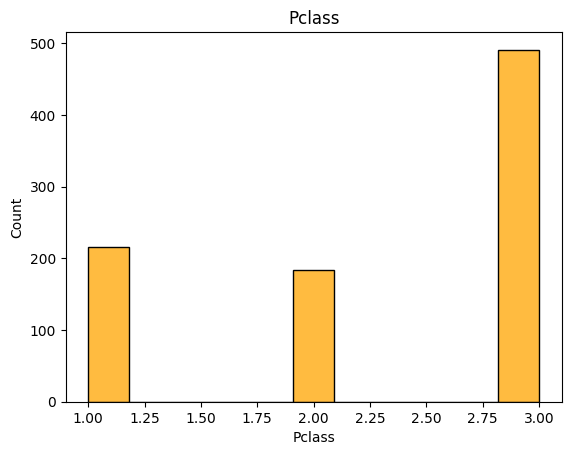

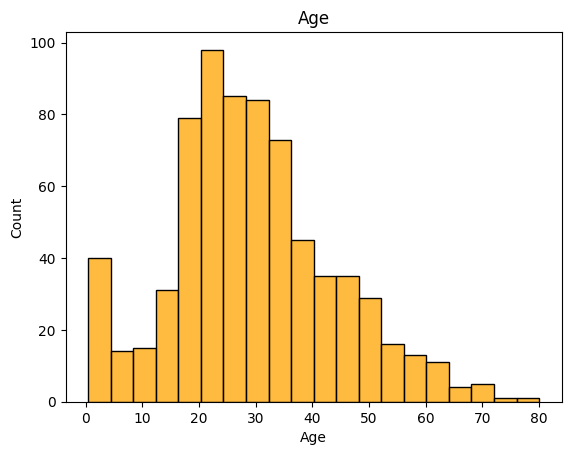

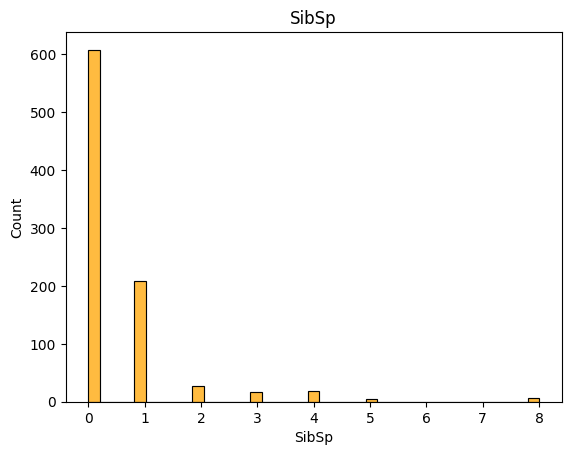

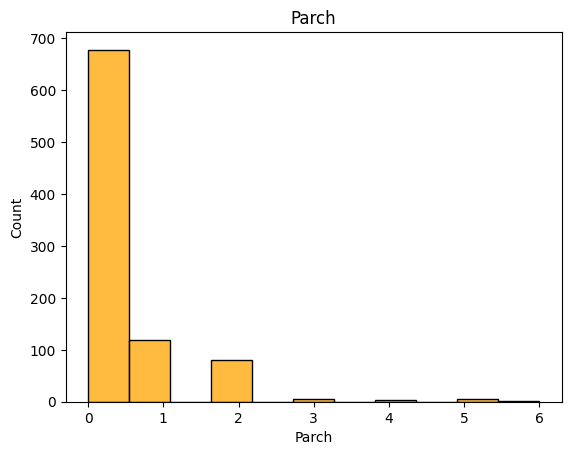

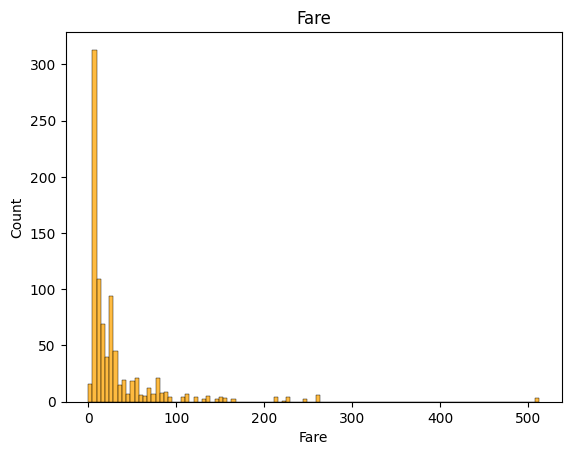

In [11]:
for i in df.select_dtypes(include='number').columns:
    sns.histplot(data = df, x = i, color='orange')
    plt.title(f"{i}")
    plt.show()

### Data Outlier

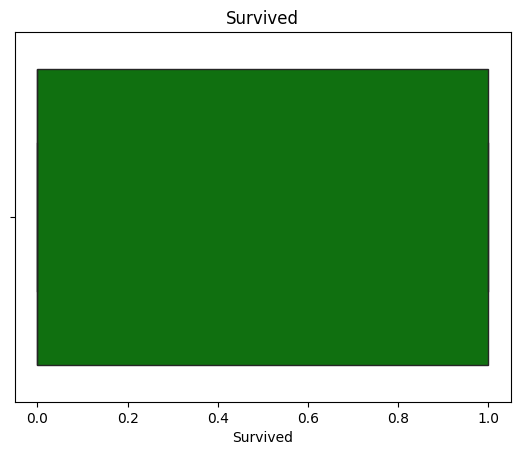

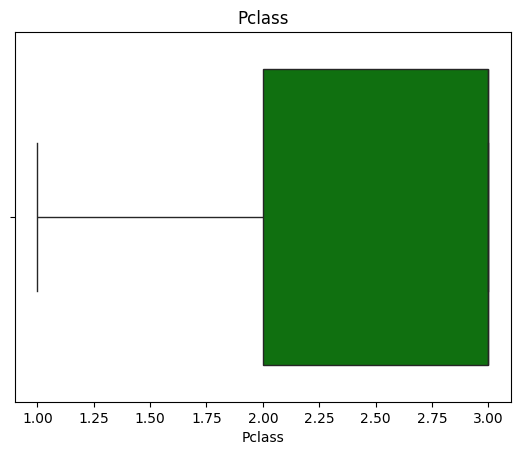

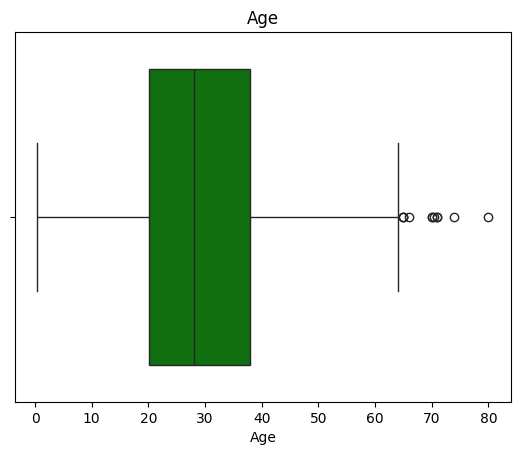

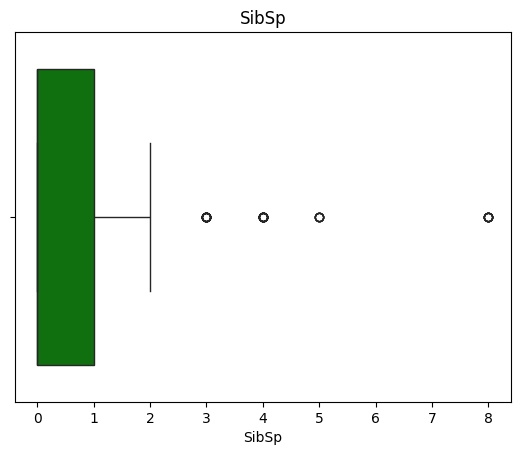

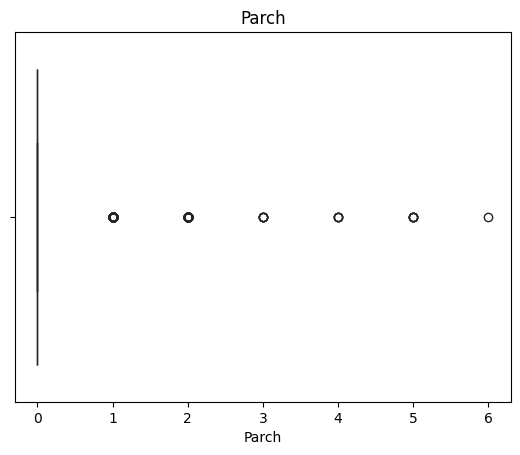

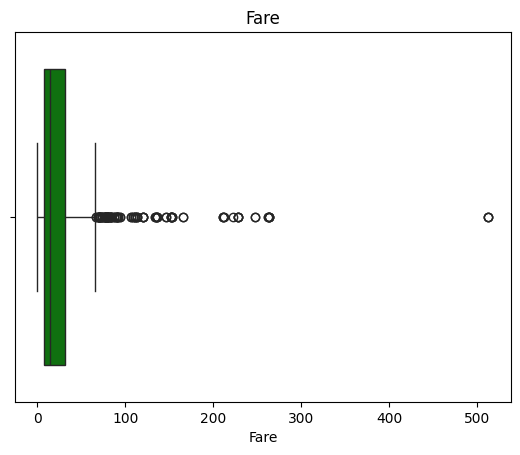

In [12]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data = df, x = i, color='green')
    plt.title(f"{i}")
    plt.show()

### Data Relationship

In [13]:
df.select_dtypes(include='number').columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

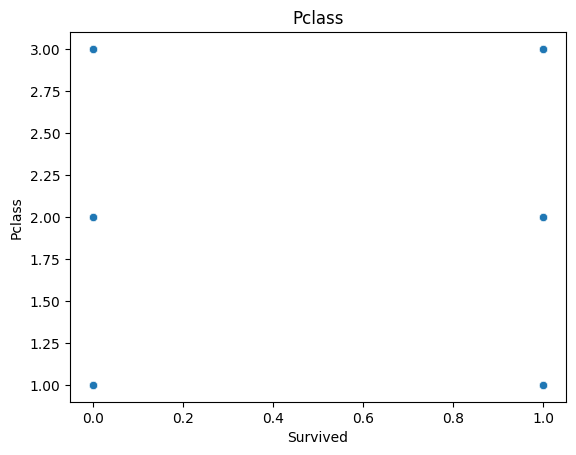

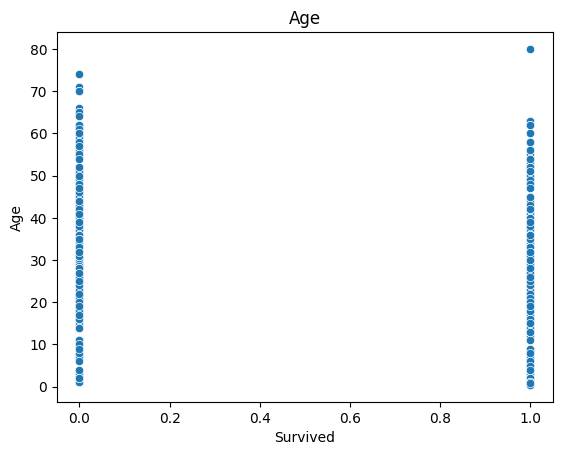

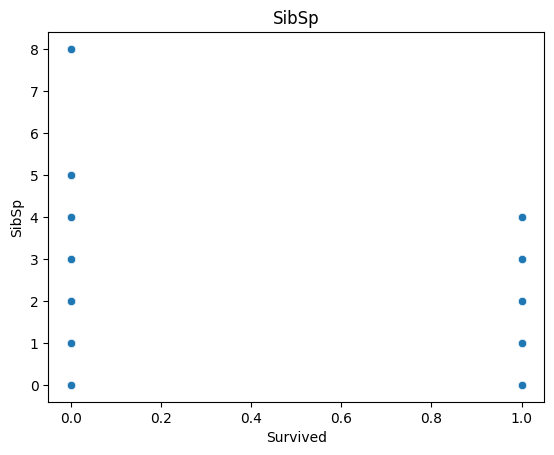

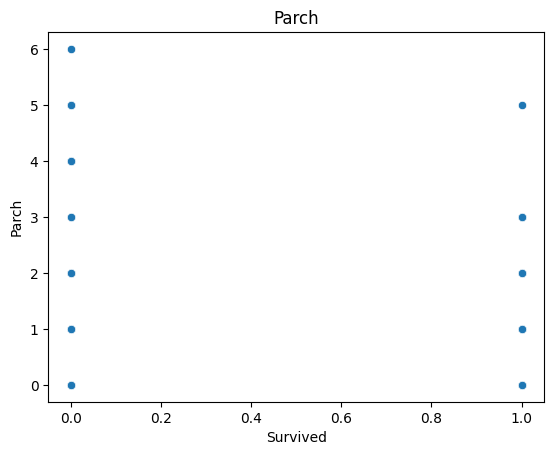

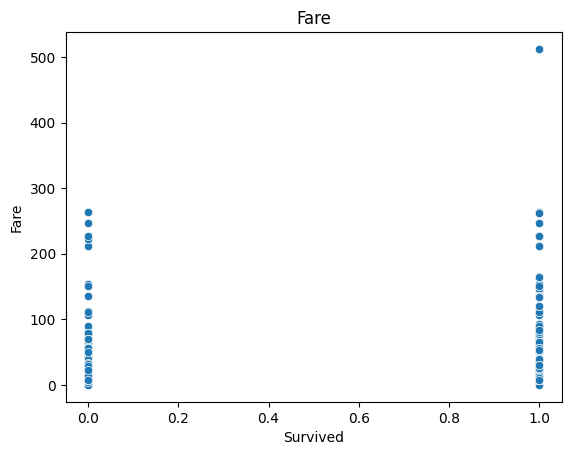

In [14]:
for i in ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']:
    sns.scatterplot(data = df, x = 'Survived', y = i, markers='x')
    plt.title(f"{i}")
    plt.show()

### Data Correlation

In [15]:
corr_data = df.select_dtypes(include='number').corr()

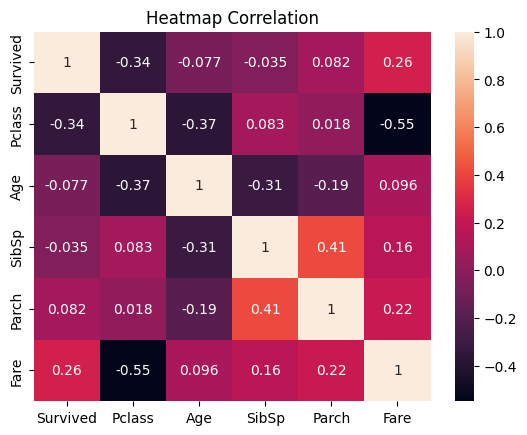

In [16]:
sns.heatmap(corr_data, annot=True)
plt.title('Heatmap Correlation')
plt.show()

## Missing Value Treatment

### Object Value

In [17]:
df['Cabin']

PassengerId
1       NaN
2       C85
3       NaN
4      C123
5       NaN
       ... 
887     NaN
888     B42
889     NaN
890    C148
891     NaN
Name: Cabin, Length: 891, dtype: object

In [18]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [19]:
df['Cabin'] = df['Cabin'].apply(lambda val : val[0] if pd.notna(val) else np.nan)
df['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [20]:
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])

In [21]:
df['Embarked']

PassengerId
1      S
2      C
3      S
4      S
5      S
      ..
887    S
888    S
889    S
890    C
891    Q
Name: Embarked, Length: 891, dtype: object

In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [23]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [24]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [25]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      0
dtype: int64

### Numerical Value

In [26]:
impute = KNNImputer()
df['Age'] = impute.fit_transform(df[['Age']])

In [27]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

## Outlier Treatment

### Titanic Dataset Summary

1. **Survived**: Binary target variable (0 = No, 1 = Yes) indicating whether the passenger survived.
2. **Pclass**: Passenger class (1 = First, 2 = Second, 3 = Third).
3. **Sex**: Gender of the passenger (male, female).
4. **Age**: Age of the passenger in years.
5. **SibSp**: Number of siblings or spouses aboard the Titanic.
6. **Parch**: Number of parents or children aboard the Titanic.
7. **Fare**: The fare paid for the Titanic ticket.
8. **Cabin**: Cabin number (often encoded as a combination of letters and numbers, e.g., C85, E46).
9. **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

In [28]:
def wisker(col):
    # q1 - > 25% 
    # q2 -> 75%
    q1, q3 = np.percentile(col, [25, 75])

    # Interquartile Range
    iqr = q3 - q1

    # Lower Wisker
    lw = q1 - 1.5 * iqr

    # Upper Wisker
    uw = q3 + 1.5 * iqr

    return lw, uw

In [29]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [30]:
for target_cols in ['Age', 'SibSp', 'Parch', 'Fare']:
    lw, uw = wisker(df[target_cols])
    df[target_cols] = np.where(df[target_cols] < lw, lw, df[target_cols])
    df[target_cols] = np.where(df[target_cols] > uw, uw, df[target_cols])

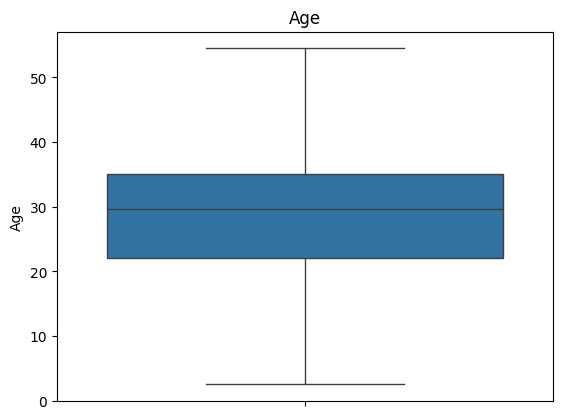

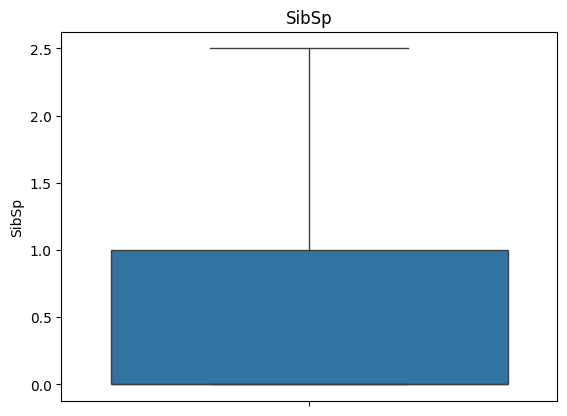

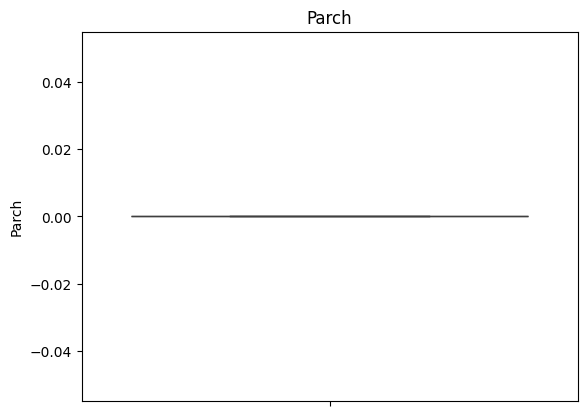

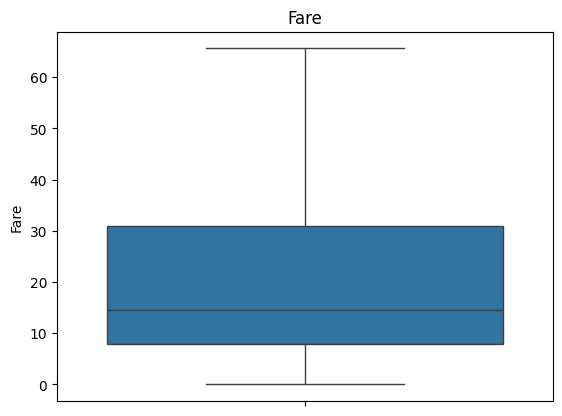

In [31]:
for target_cols in ['Age', 'SibSp', 'Parch', 'Fare']:
    sns.boxplot(df[target_cols])
    plt.title(f'{target_cols}')
    plt.show()

## Data Encoding

In [32]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.000000,1.0,0.0,7.2500,C,S
2,1,1,female,38.000000,1.0,0.0,65.6344,C,C
3,1,3,female,26.000000,0.0,0.0,7.9250,C,S
4,1,1,female,35.000000,1.0,0.0,53.1000,C,S
5,0,3,male,35.000000,0.0,0.0,8.0500,C,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0.0,0.0,13.0000,C,S
888,1,1,female,19.000000,0.0,0.0,30.0000,B,S
889,0,3,female,29.699118,1.0,0.0,23.4500,C,S


In [33]:
df = pd.get_dummies(data = df, columns=['Sex', 'Cabin', 'Embarked'], drop_first=True)

In [34]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,
1,0,3,22.000000,1.0,0.0,7.2500,True,False,True,False,False,False,False,False,False,True
2,1,1,38.000000,1.0,0.0,65.6344,False,False,True,False,False,False,False,False,False,False
3,1,3,26.000000,0.0,0.0,7.9250,False,False,True,False,False,False,False,False,False,True
4,1,1,35.000000,1.0,0.0,53.1000,False,False,True,False,False,False,False,False,False,True
5,0,3,35.000000,0.0,0.0,8.0500,True,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.000000,0.0,0.0,13.0000,True,False,True,False,False,False,False,False,False,True
888,1,1,19.000000,0.0,0.0,30.0000,False,True,False,False,False,False,False,False,False,True
889,0,3,29.699118,1.0,0.0,23.4500,False,False,True,False,False,False,False,False,False,True


# Data Engneering

In [35]:
# Selecting feature columns (excluding 'Survived' which is the target)
feature_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Embarked_Q', 'Embarked_S']

scaler = StandardScaler()
df[feature_columns] = scaler.fit_transform(df[feature_columns])

# Data Splitting

In [36]:
X = df.drop(columns='Survived')
y = df['Survived']

In [37]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training

In [108]:
model = LogisticRegression()

## Hyperparameter Tunning

In [156]:
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength for Logistic Regression
    'penalty': ['l1', 'l2'],  # Regularization types
    'solver': ['liblinear', 'saga'],  # Solvers to be used
    'max_iter': [100, 200, 300, 1000],  # Maximum iterations for convergence
}

In [161]:
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42)
random_search.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'max_iter': [100, 200, 300, 1000],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42)

In [162]:
print("Best Hyperparameters:", random_search.best_params_)
print("Best Cross-validation Score:", random_search.best_score_)

Best Hyperparameters: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 1000, 'C': 10}
Best Cross-validation Score: 0.7929419354838709


In [163]:
ypred = random_search.best_estimator_.predict(xtest)
yprob = random_search.best_estimator_.predict_proba(xtest)[:, 1]

# Evaluation

In [164]:
accuracy = accuracy_score(ytest, ypred)
precision = precision_score(ytest, ypred)
recall = recall_score(ytest, ypred)
f1 = f1_score(ytest, ypred)
roc_auc = roc_auc_score(ytest, yprob)
cm = confusion_matrix(ytest, ypred)
report = classification_report(ytest, ypred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print()
print("Confusion Matrix:")
print(cm)
print()
print("Classification Report:")
print(report)

Accuracy: 0.79
Precision: 0.75
Recall: 0.72
F1-Score: 0.74
ROC-AUC Score: 0.87

Confusion Matrix:
[[131  26]
 [ 31  80]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       157
           1       0.75      0.72      0.74       111

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

